# Modelos de Machine Learning
Instalamos las dependencias necesarias: numpy, pandas, scikit-learn

In [6]:
%pip install numpy
%pip install pandas
%pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importamos las librerias que vamos a usar

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Leemos el archivo que incluye la base de datos con la librería pandas. Extraemos los datos que necesitamos para el modelo y la variable dependiente con la que lo estamos comparando. Dividimos los datos en entrenamiento y test.

In [8]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

X = data[['SA', 'SBR', 'T (K)', 'SR', 'C (%)', 'N (%)', 'H (%)', 'O (%)']]
y = data['volH2 (%)']

# Dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Regresión lineal
Analizamos el modelo de regresión lineal y calculamos su valor de validación cruzada

In [9]:
# Modelo 1: Regresión lineal

model1 = LinearRegression()
score1 = cross_val_score(model1, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross validation score: {-np.mean(score1):.3f}",)

# Ajustamos el modelo
model1.fit(X_train, y_train)
print(f"Test score: {model1.score(X_test, y_test):.3f}")


Cross validation score: 5.835
Test score: 0.834


## Regresión polinómica
Analizamos el modelo y buscamos mejores hiperparámetros. Sobre esos hiperparámetros calculamos el valor de la validación cruzada

In [10]:
# Crear un pipeline con la transformación polinómica y el modelo de regresión lineal
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),  # Transformación polinómica
    ('scaler', StandardScaler()),             # Estandarización de las características
    ('linear_regression', LinearRegression()) # Modelo de regresión lineal
])

# Definir los hiperparámetros a ajustar
param_grid = {
    'poly_features__degree': [2, 3, 4, 5, 6, 7]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Obtner la evaluación cruzada del mejor modelo
score2 = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross validation score: {-np.mean(score2):.3f}")


Best parameters: {'poly_features__degree': 4}
Cross validation score: 34.863


## Regresión Ridge
Este modelo reduce la complejidad del modelo y previene el sobreajuste al añadir una penalización a la suma de los cuadrados de los coeficientes del modelo.

Dentro del modelo α es el parámetro de regularización que controla la cantidad de penalización

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_regression', Ridge())              
])

# Definir los hiperparámetros a ajustar
param_grid = {
    'ridge_regression__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Calcular la validación cruzada usando cross_val_score
best_model = grid_search.best_estimator_
score3 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Cross-Validation Score (MSE): {-np.mean(score3):.3f}')


Best parameters: {'ridge_regression__alpha': 1.0}
Mean Cross-Validation Score (MSE): 4.021


## Regresión Lasso
Es muy parecida a la regresión Ridge, pero utiliza otro tipo de penalización (que también representamos con α (alpha))

In [12]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_regression', Lasso())              
])

# Definir los hiperparámetros a ajustar
param_grid = {
    'lasso_regression__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Calcular la validación cruzada usando cross_val_score
best_model = grid_search.best_estimator_
score4 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Cross-Validation Score (MSE): {-np.mean(score4):.3f}')


Best parameters: {'lasso_regression__alpha': 0.1}
Mean Cross-Validation Score (MSE): 3.752


## Regresión con Máquinas de Soporte Vectorial (SVR)

La Regresión con Máquinas de Soporte Vectorial (SVR) es un modelo de aprendizaje automático utilizado para predecir valores numéricos basados en datos previos. Funciona buscando una "línea" o "superficie" en un espacio de muchas dimensiones que mejor se ajuste a los datos proporcionados.

In [13]:
# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Crear un modelo de regresión de vectores de soporte
model = SVR()

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Calcular la validación cruzada usando cross_val_score
best_model = grid_search.best_estimator_
score5 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Cross-Validation Score (MSE): {-np.mean(score5):.3f}')

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Cross-Validation Score (MSE): 2.765


## Árboles de decisión para regresión 

Los árboles de decisión para regresión son modelos que dividen el espacio de características en regiones rectangulares, de modo que cada región predice un valor numérico para la variable objetivo

In [14]:
# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Calcular la validación cruzada usando cross_val_score
best_model = grid_search.best_estimator_
score6 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Cross-Validation Score (MSE): {-np.mean(score6):.3f}')


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Cross-Validation Score (MSE): 6.682


## Bosques aleatorios

Los Bosques Aleatorios son conjuntos de árboles de decisión que se entrenan en diferentes subconjuntos del conjunto de datos. Cada árbol individual en el bosque genera una predicción y la media de las predicciones se toma como la predicción final del modelo.

In [15]:
# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un modelo de bosque aleatorio
model = RandomForestRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Calcular la validación cruzada usando cross_val_score
best_model = grid_search.best_estimator_
score7 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Mean Cross-Validation Score (MSE): {-np.mean(score7):.3f}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Cross-Validation Score (MSE): 5.175


## Modelo final

El modelo final es la Regresión con Máquinas de Soporte Vectorial pues contiene el valor de la validación cruzda más bajo (es mejor porque estamos usando scoring='neg_mean_squared_error')

In [16]:
# Definir la cuadrícula de parámetros a explorar
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Crear un modelo de regresión de vectores de soporte
model = SVR()

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluamos el modelo
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print(y_pred)

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Coeficiente de determinación (R²): {r2:.3f}')
print(f'Error cuadrático medio (MSE): {mse:.3f}')
print(f'Error absoluto medio (MAE): {mae:.3f}')


Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
[28.11140349 32.02160497 29.53292315 31.70012151 33.74122328 33.93110296]
Coeficiente de determinación (R²): 0.826
Error cuadrático medio (MSE): 1.513
Error absoluto medio (MAE): 0.965


In [17]:
%pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


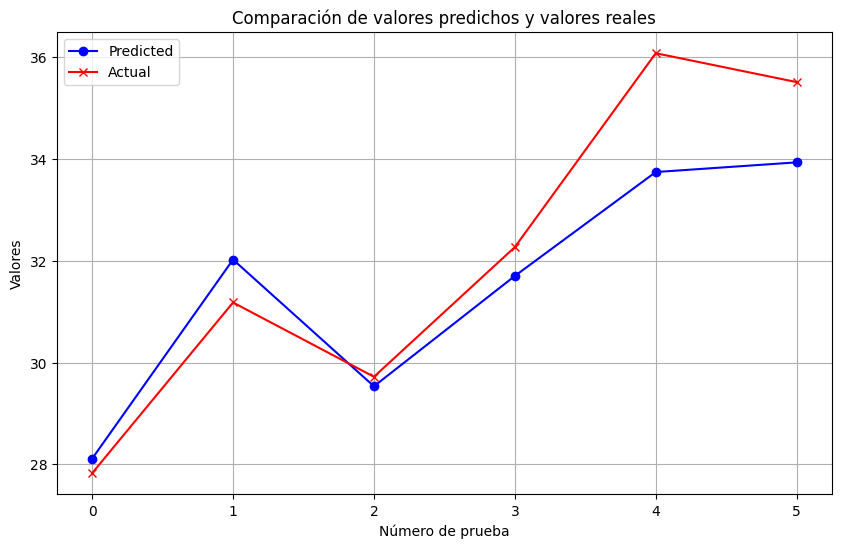

In [21]:
import matplotlib.pyplot as plt

# Compara los valores predichos con los valores reales
y_pred = best_model.predict(X_test)
y_actual = y_test

x_values = range(len(y_pred))

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_pred, label='Predicted', color='blue', marker='o')  # Plotting the predicted values
plt.plot(x_values, y_actual, label='Actual', color='red', marker='x')  # Plotting the actual values

plt.title('Comparación de valores predichos y valores reales')
plt.xlabel('Número de prueba')  # Label for the x-axis
plt.ylabel('Valores')  # Label for the y-axis
plt.legend()
plt.grid(True)
plt.show()